# Analisando os assinantes de um jornal

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_jornal = pd.read_csv("base_dados_time_series/newsletter_alucar.csv", sep=",")
df_jornal.head(2)

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10


### Convertendo a coluna data de object para datatime

In [10]:
df_jornal['mes'] = pd.to_datetime(df_jornal['mes'])
df_jornal.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [14]:
#Comparação do número de assinantes entre os meses
df_jornal['diferenca'] = df_jornal['assinantes'].diff()
df_jornal.head()

,mes,assinantes,diferenca
0,2017-01-31,0,NaN
1,2017-02-28,10,10.0
2,2017-03-31,21,11.0
3,2017-04-30,34,13.0
4,2017-05-31,49,15.0


In [15]:
#Oscilação entre a diferença de assinantes
df_jornal['oscilacao'] = df_jornal['diferenca'].diff()
df_jornal.head()

,mes,assinantes,diferenca,oscilacao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


## Plotando gráficos

In [31]:
def plotar_grafico(x, y, dataset, titulo, xlabel, ylabel):
    #Definindo o tipo do gráfico
    sns.set_palette("Accent")
    sns.set_style("dark")
    
    #Plotando
    grafico = sns.lineplot(x = x, y = y, data = dataset)
    
    #Padronizando
    grafico.set_title(titulo)
    grafico.set_xlabel(xlabel)
    grafico.set_ylabel(ylabel)
    grafico.figure.set_size_inches(12, 6)
               

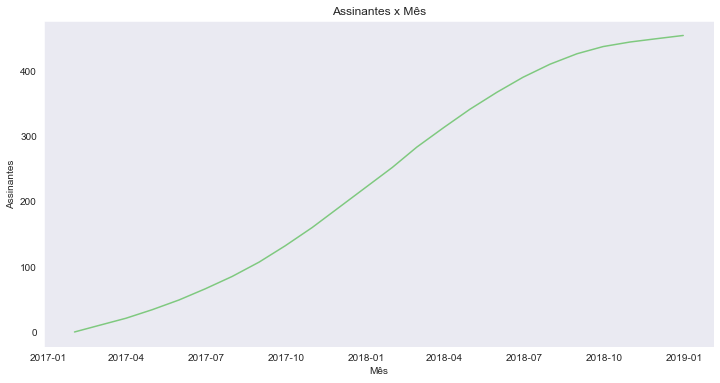

In [33]:
plotar_grafico('mes', 'assinantes', df_jornal, "Assinantes x Mês", "Mês", "Assinantes")

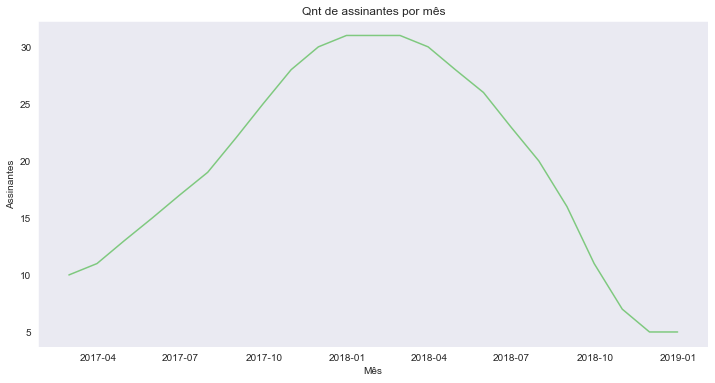

In [34]:
plotar_grafico('mes', 'diferenca', df_jornal, "Qnt de assinantes por mês", "Mês", "Assinantes")

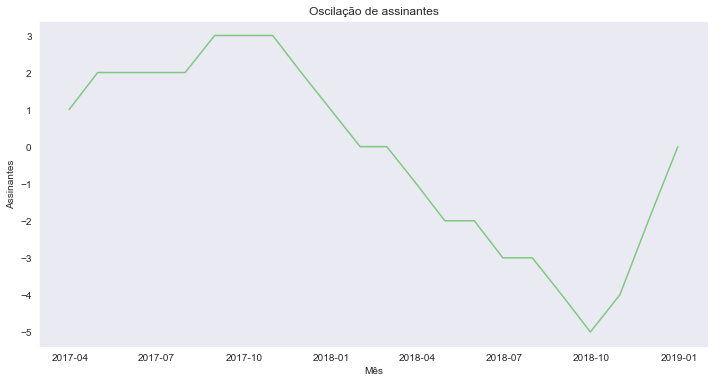

In [36]:
plotar_grafico('mes', 'oscilacao', df_jornal, "Oscilação de assinantes", "Mês", "Assinantes")

## Plotando gráficos aninhados

In [56]:
def plotar_grafico_aninhado(x, y1, y2, y3, dataset, title):
    
    #Definir o tamanho dos gráficos
    plt.figure(figsize=(15, 8))
    
    #Definindo a disposição dos gráficos
    plt.subplot(3, 1, 1)
    sns.lineplot(x = x, y = y1, data = dataset)
    
    plt.subplot(3, 1, 2)
    sns.lineplot(x = x, y = y2, data = dataset)
    
    plt.subplot(3, 1, 3)
    sns.lineplot(x = x, y = y3, data = dataset)

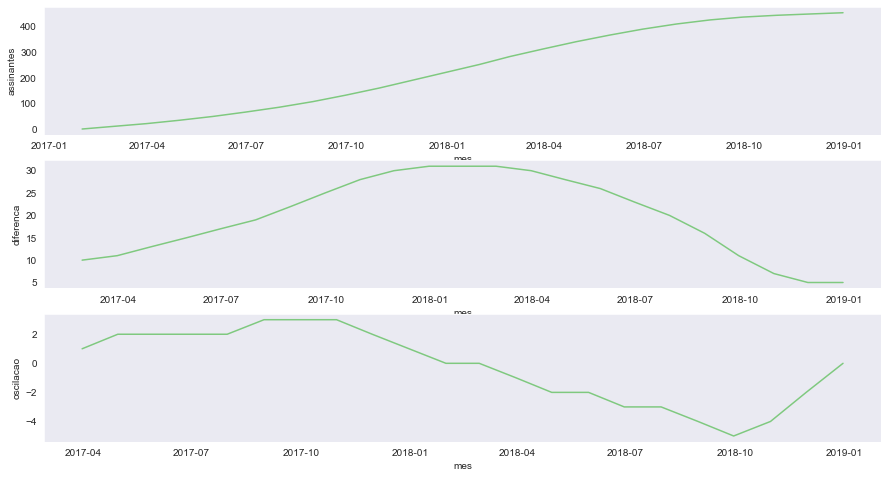

In [57]:
plotar_grafico_aninhado('mes', 'assinantes', 'diferenca', 'oscilacao', df_jornal, "Teste")

# Analisando a venda de chocolates

In [78]:
df_vendas = pd.read_csv("base_dados_time_series/vendas_por_dia.csv")
df_vendas.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [79]:
df_vendas['dia'] = pd.to_datetime(df_vendas['dia'])

## Adicionando o dia da semana

In [80]:
df_vendas['dia_semana'] = df_vendas['dia'].dt.day_name()
df_vendas

,dia,vendas,dia_semana
0,2018-10-01,50,Monday
1,2018-10-02,48,Tuesday
2,2018-10-03,56,Wednesday
3,2018-10-04,50,Thursday
4,2018-10-05,51,Friday
...,...,...,...
56,2018-11-26,54,Monday
57,2018-11-27,60,Tuesday
58,2018-11-28,49,Wednesday
59,2018-11-29,50,Thursday


In [81]:
df_vendas['dia_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

### Traduzindo os dias da semana

In [82]:
dia_semana_traduzido = {'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 
                        'Saturday':'Sábado', 'Sunday':'Domingo'}

In [83]:
df_vendas['dia_semana'] = df_vendas['dia_semana'].map(dia_semana_traduzido)
df_vendas

,dia,vendas,dia_semana
0,2018-10-01,50,Segunda
1,2018-10-02,48,Terça
2,2018-10-03,56,Quarta
3,2018-10-04,50,Quinta
4,2018-10-05,51,Sexta
...,...,...,...
56,2018-11-26,54,Segunda
57,2018-11-27,60,Terça
58,2018-11-28,49,Quarta
59,2018-11-29,50,Quinta


### Agrupando a média das vendas por dia da semana

In [86]:
df_vendas.groupby('dia_semana')['vendas'].mean().round(2)

dia_semana
Domingo    18.88
Quarta     53.11
Quinta     51.33
Segunda    52.33
Sexta      44.56
Sábado     15.88
Terça      51.67
Name: vendas, dtype: float64